In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('loan_eligibility.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:>

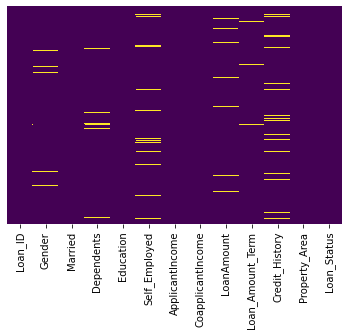

In [5]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

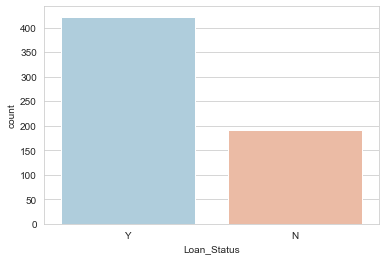

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status', data=data, palette='RdBu_r')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

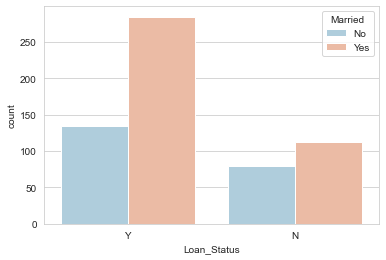

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status', hue='Married', data=data, palette='RdBu_r')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

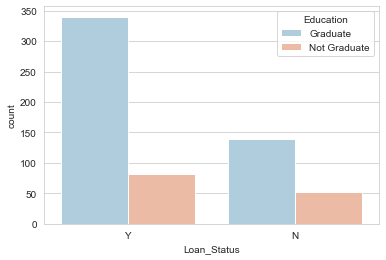

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status', hue='Education', data=data, palette='RdBu_r')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

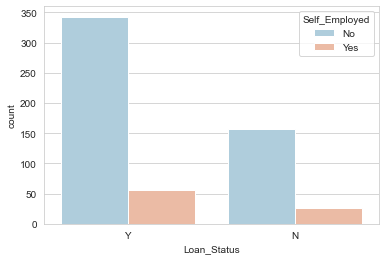

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status', hue='Self_Employed', data=data, palette='RdBu_r')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

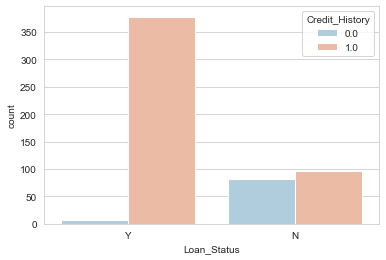

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status', hue='Credit_History', data=data, palette='RdBu_r')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

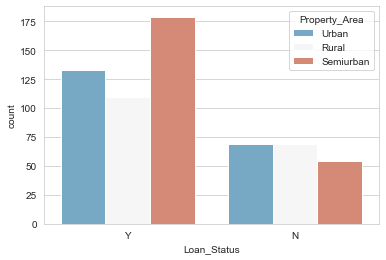

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status', hue='Property_Area', data=data, palette='RdBu_r')

<AxesSubplot:xlabel='Self_Employed', ylabel='Credit_History'>

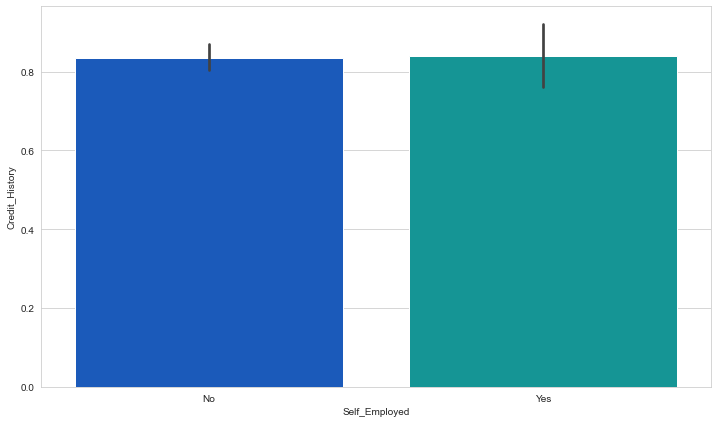

In [12]:
plt.figure(figsize=(12,7))
sns.barplot(x='Self_Employed', y='Credit_History', data=data, palette='winter')

In [13]:
#CONVERTING TO NUMERICAL VALUES
data['Gender'] = data['Gender'].replace({"Male": 1, "Female" : 0})

In [14]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [15]:
data['Married'] = data['Married'].replace({"Yes": 1, "No" : 0})

In [16]:
data['Education'] = data['Education'].replace({"Graduate": 1, "Not Graduate" : 0})

In [17]:
data['Loan_Status'] = data['Loan_Status'].replace({"Y": 1, "N" : 0})

In [18]:
data['Self_Employed'] = data['Self_Employed'].replace({"Yes": 1, "No" : 0})

In [19]:
#USING LABEL ENCODER TO FILL IN MISSING VALUES
from sklearn.preprocessing import LabelEncoder

In [20]:
feature_col = ['Property_Area', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    data[col] = le.fit_transform(data[col])

In [21]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [22]:
data.info() #All Numerical Values now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(7), int32(2), int64(3), object(1)
memory usage: 57.7+ KB


In [23]:
#FILLING MISSING VALUES

data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [24]:
data['Married'].fillna(data['Married'].mode()[0], inplace=True)

In [25]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

In [26]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [27]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)

In [28]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [29]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


In [30]:
data.info() #No more Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(7), int32(2), int64(3), object(1)
memory usage: 57.7+ KB


<AxesSubplot:>

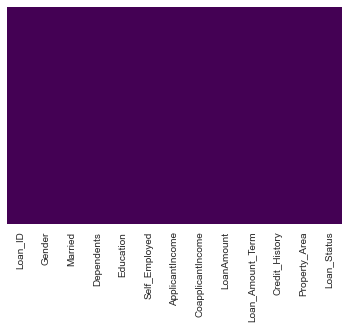

In [31]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

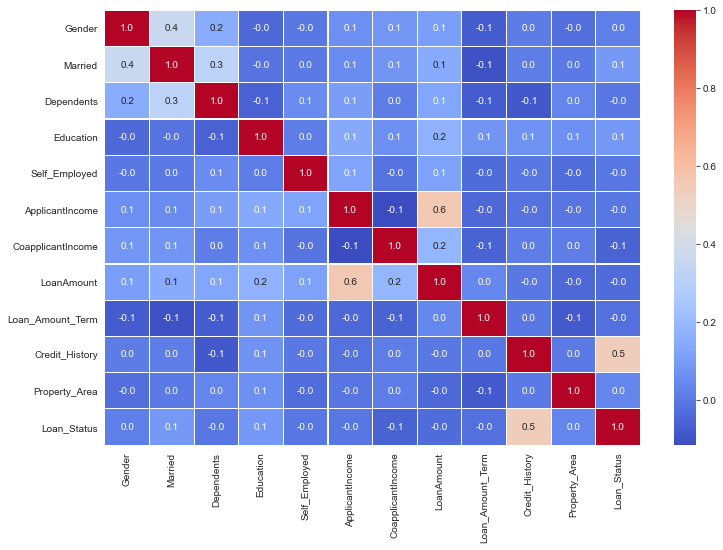

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)

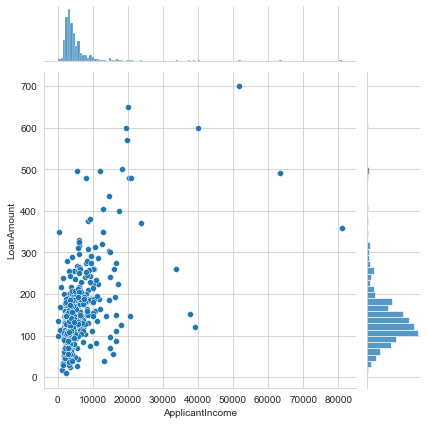

In [33]:
#RELATIONSHIP BETWEEN APPLICANT INCOME AND LOAN AMOUNT
sns.jointplot(x='ApplicantIncome', y='LoanAmount', data=data)

### TRAIN MODEL

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


In [36]:
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()

In [39]:
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
predictions = model.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1], dtype=int64)

In [41]:
#MODEL EVALUATION
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
print(confusion_matrix(y_test, predictions), '\n')
print(classification_report(y_test, predictions))

[[ 34  38]
 [  2 129]] 

              precision    recall  f1-score   support

           0       0.94      0.47      0.63        72
           1       0.77      0.98      0.87       131

    accuracy                           0.80       203
   macro avg       0.86      0.73      0.75       203
weighted avg       0.83      0.80      0.78       203



In [43]:
# SAVING MODEL TO A PICKLE FILE
import pickle as pkl

In [44]:
filename = 'Loan_Eligibility_Model.pkl'
pkl.dump(model, open(filename, 'wb'))

In [45]:
# TESTING MODEL WITH NEW DATA
result = model.predict([[0.0, 1.0, 0, 0, 0.0, 5000, 0.0, 950000, 180.0, 0, 0]])

if result==1:
    print('You are Eligible for Loan')
else:
    print('You are Not Eligible for Loan')

You are Not Eligible for Loan


In [46]:
# Categorical Columns like Dependents and PropertyArea should be converted to a 0 & 1 column using get_dummies.